In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

import numpy

In [29]:
df = pd.read_excel("source_data/2021_individual_unit_files/21emp.xlsx")

In [4]:
df_2020 = pd.read_excel("source_data/2020_individual_unit_files/20emp.xlsx")

In [5]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83811 entries, 0 to 83810
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                83811 non-null  object 
 1   Type of Government                   83811 non-null  object 
 2   Name of Government                   83811 non-null  object 
 3   Government Function                  83811 non-null  object 
 4   Full-time Employees                  83811 non-null  int64  
 5   Full-time Employees Data Flag        83811 non-null  object 
 6   Full-time Payroll                    83811 non-null  int64  
 7   Full-time Payroll Data Flag          83811 non-null  object 
 8   Part-time Employees                  83811 non-null  int64  
 9   Part-time Employees Data Flag        83811 non-null  object 
 10  Part-time Payroll                    83811 non-null  int64  
 11  Part-time Payroll Data Flag 

In [22]:
df_2020['Type of Government'].unique()

array(['State', 'County', 'Municipality', 'Special District',
       'Independent School District', 'Township'], dtype=object)

In [71]:
# Population in Indep, MO:
pop_indep= df_2021[(df_2021["State"] == "Missouri")&(df_2021["Name of Government"].str.contains("Independence"))]\
.iloc[1]["Population/Enrollment/Function Code"].sum()
pop_indep

116672

In [68]:
# Police officers in MO 2021:
police_i = df_2021[(df_2021["Government Function"] == "Police Protection - Persons with Power of Arrest")&\
(df_2021["State"] == "Missouri")&(df_2021["Name of Government"].str.contains("Independence"))]\
["Full-time Employees"].sum()
police_i

192

In [73]:
236/pop_indep*100000

202.27646736149205

In [69]:
# Police officers in MO 2020:
police_i_old = df_2020[(df_2020["Government Function"] == "Police Protection - Persons with Power of Arrest")&\
(df_2020["State"] == "Missouri")&(df_2020["Name of Government"].str.contains("Independence"))]\
["Full-time Employees"].sum()
police_i_old

195

In [38]:
# rate of police officers in population
rate_indep = police_i/pop_indep*100000
rate_indep

164.56390565002744

In [61]:
# Population in Kansas city, MO:
pop_k = df_2021[(df_2021["State"] == "Missouri")&(df_2021["Name of Government"] == "Kansas City")]\
.iloc[1]["Population/Enrollment/Function Code"].sum()
pop_k

495327

In [62]:
police_k = df_2021[(df_2021["Government Function"] == "Police Protection - Persons with Power of Arrest")&\
(df_2021["State"] == "Missouri")&(df_2021["Name of Government"] == "Kansas City")]\
["Full-time Employees"].sum()
police_k

1259

In [60]:
rate_kansas = police_k/pop_k*100000
rate_kansas

254.17552445152393

In [64]:
# Population in Indep, MO:
pop_lees= df_2021[(df_2021["State"] == "Missouri")&(df_2021["Name of Government"].str.contains("Lees Summit"))]\
.iloc[1]["Population/Enrollment/Function Code"].sum()
pop_lees

99357

In [66]:
police_l = df_2021[(df_2021["Government Function"] == "Police Protection - Persons with Power of Arrest")&\
(df_2021["State"] == "Missouri")&(df_2021["Name of Government"].str.contains("Lees Summit"))]\
["Full-time Employees"].sum()
police_l

139

In [67]:
rate_l = police_l/pop_lees*100000
rate_l

139.89955413307567

In [30]:
df["average_fulltime_pay"] = df["Full-time Payroll"]/df["Full-time Employees"]
#df_2020["average_fulltime_pay"] = df_2020["Full-time Payroll"]/df_2020["Full-time Employees"]

In [32]:
df[df["Government Function"] == "Police Protection - Persons with Power of Arrest"]["Full-time Payroll"].sum()

4418236693

In [34]:
df[df["Government Function"] == "Police Protection - Persons with Power of Arrest"]["Full-time Employees"].sum()

580022

In [35]:
4418236693/580022

7617.360536324484

In [36]:
df[(df["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
  (df["State"] == "Missouri")]["Full-time Payroll"].sum()

60555830

In [37]:
df[(df["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
  (df["State"] == "Missouri")]["Full-time Employees"].sum()

10504

In [38]:
60555830/10504

5765.025704493526

In [22]:
df["average_fulltime_pay"] = df["Full-time Payroll"]/df["Full-time Employees"]
df["average_annual_pay"] = df["average_fulltime_pay"]*12

In [24]:
df = df[(df["State"] == "Missouri") &\
  (df["Name of Government"].str.contains("Independence"))].sort_values("average_fulltime_pay", ascending = False)
df[["Government Function", "Full-time Employees", "average_annual_pay"]]

,Government Function,Full-time Employees,average_annual_pay
41866,Electric Power,122,99395.409836
41858,Fire Protection - Other,9,95132.000000
41853,Other Government Administration,11,81646.909091
41854,Judicial and Legal,14,75797.142857
41857,Fire Protection - Firefighters,159,72334.415094
41851,Total - All Government Employment Functions,839,70815.933254
41855,Police Protection - Persons with Power of Arrest,192,70546.187500
41852,Financial Administration,24,68225.500000
41865,Water Supply,48,67417.750000
41867,All other and unallocable,73,66370.356164


In [1]:
df_20_payroll = df_2020[(df_2020["State"] == "Missouri") &\
  (df_2020["Name of Government"].str.contains("Independence"))].sort_values("average_fulltime_pay", ascending = False)

NameError: name 'df_2020' is not defined

In [28]:
df = df[(df["State"] == "Missouri") &\
  (df["Name of Government"] == "Kansas City")].sort_values("average_fulltime_pay", ascending = False)
df[["Government Function", "Full-time Employees", "average_annual_pay"]]

,Government Function,Full-time Employees,average_annual_pay


In [32]:
df = df[(df["State"] == "Missouri") &\
  (df["Name of Government"] == "Kansas City")].sort_values("average_fulltime_pay", ascending = False)
df[["Government Function", "Full-time Employees", "average_fulltime_pay"]]

,Government Function,Full-time Employees,average_fulltime_pay
41875,Fire Protection - Other,666,7005.312312
41872,Police Protection - Persons with Power of Arrest,1259,6831.785544
41880,Solid Waste Management,36,6216.388889
41874,Fire Protection - Firefighters,613,6126.755302
41870,Other Government Administration,406,5866.605911
41869,Financial Administration,89,5707.067416
41868,Total - All Government Employment Functions,6078,5604.538335
41885,All other and unallocable,36,5398.138889
41881,Sewerage,136,5387.411765
41883,Housing and Community Development,85,5319.164706


In [43]:
df[(df["State"] == "Missouri") &\
  (df["Name of Government"].str.contains("Lees Summit"))].sort_values("average_fulltime_pay", ascending = False)

,State,Type of Government,Name of Government,Government Function,Full-time Employees,Full-time Employees Data Flag,Full-time Payroll,Full-time Payroll Data Flag,Part-time Employees,Part-time Employees Data Flag,...,Census Region,County Name,FIPS State,FIPS County,Population/Enrollment/Function Code,Year of Population/Enrollment,School Level,Probability of Selection,Worksheet Code,average_fulltime_pay
41892,Missouri,Municipality,Lees Summit,Fire Protection - Firefighters,133,R,941687,R,0,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,7080.353383
41897,Missouri,Municipality,Lees Summit,Solid Waste Management,1,R,6851,R,0,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,6851.000000
41889,Missouri,Municipality,Lees Summit,Judicial and Legal,13,R,87234,R,6,C,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,6710.307692
41890,Missouri,Municipality,Lees Summit,Police Protection - Persons with Power of Arrest,139,R,844905,R,0,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,6078.453237
41886,Missouri,Municipality,Lees Summit,Total - All Government Employment Functions,659,R,3710490,R,166,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,5630.485584
41887,Missouri,Municipality,Lees Summit,Financial Administration,46,R,258819,R,1,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,5626.500000
41888,Missouri,Municipality,Lees Summit,Other Government Administration,52,R,285729,R,2,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,5494.788462
43126,Missouri,Independent School District,Lees Summit Sch Dist R-7,Education - Elementary and Secondary Instructi...,1432,R,7826282,R,10,R,...,Midwest,Jackson,29,95.0,18410,NaN,Elementary and Secondary,1.0,8,5465.280726
41893,Missouri,Municipality,Lees Summit,Fire Protection - Other,15,R,77330,R,0,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,5155.333333
41895,Missouri,Municipality,Lees Summit,Highways,70,R,358353,R,1,R,...,Midwest,Jackson,29,95.0,99357,20.0,NaN,1.0,4,5119.328571


In [25]:
df[(df["State"] == "Missouri") &\
  (df["Name of Government"]=="Kansas City")].sort_values("average_fulltime_pay", ascending = False)

,State,Type of Government,Name of Government,Government Function,Full-time Employees,Full-time Employees Data Flag,Full-time Payroll,Full-time Payroll Data Flag,Part-time Employees,Part-time Employees Data Flag,...,County Name,FIPS State,FIPS County,Population/Enrollment/Function Code,Year of Population/Enrollment,School Level,Probability of Selection,Worksheet Code,average_fulltime_pay,average_annual_pay


In [52]:
df_2021_short = df[["State", "Type of Government", "Name of Government",\
    "Government Function", "Full-time Employees",\
    "Full-time Payroll", "average_fulltime_pay"]].rename(columns = {
    "Full-time Employees": "Full-time Employees 2021",
    "Full-time Payroll": "Full-time Payroll 2021",
    "average_fulltime_pay": "average_fulltime_pay 2021"
})

In [53]:
df_2020_short = df_2020[["State", "Type of Government", "Name of Government",\
    "Government Function", "Full-time Employees",\
    "Full-time Payroll", "average_fulltime_pay"]].rename(columns = {
    "Full-time Employees": "Full-time Employees 2020",
    "Full-time Payroll": "Full-time Payroll 2020",
    "average_fulltime_pay": "average_fulltime_pay 2020"
})

In [55]:
df_merge = pd.merge(df_2021_short, df_2020_short, on=["State", "Type of Government", "Name of Government",\
    "Government Function"])

In [103]:
df_merge["employee_diff"] = df_merge["Full-time Employees 2021"] - df_merge["Full-time Employees 2020"]
df_merge["average_pay_diff"] = df_merge["average_fulltime_pay 2021"] - df_merge["average_fulltime_pay 2020"]
df_merge["employee_diff_pct"] = df_merge["employee_diff"] / df_merge["Full-time Employees 2020"] * 100

In [60]:
df_merge[df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest"]\
    ["Full-time Employees 2021"].sum()

580440

In [61]:
df_merge[df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest"]\
    ["Full-time Employees 2020"].sum()

587355

In [63]:
580440 - 587355 

-6915

In [70]:
df_merge[df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest"]\
["employee_diff"].describe()

count    4575.000000
mean       -1.511475
std        29.730678
min     -1380.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max       544.000000
Name: employee_diff, dtype: float64

In [96]:
df_merge[df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest"]\
["employee_diff_pct"].describe()

count    4547.000000
mean             inf
std              NaN
min        -1.000000
25%        -0.029742
50%         0.000000
75%         0.020554
max              inf
Name: employee_diff_pct, dtype: float64

In [74]:
df_merge[df_merge["employee_diff"] == -1380.000000]

,State,Type of Government,Name of Government,Government Function,Full-time Employees 2021,Full-time Payroll 2021,average_fulltime_pay 2021,Full-time Employees 2020,Full-time Payroll 2020,average_fulltime_pay 2020,employee_diff,average_pay_diff
51192,New York,Municipality,New York,Police Protection - Persons with Power of Arrest,34875,261931681,7510.585835,36255,286581907,7904.617487,-1380,-394.031652


In [79]:
-1380/36255

-0.03806371534960695

In [77]:
df_merge[df_merge["employee_diff"] == 544.000000]

,State,Type of Government,Name of Government,Government Function,Full-time Employees 2021,Full-time Payroll 2021,average_fulltime_pay 2021,Full-time Employees 2020,Full-time Payroll 2020,average_fulltime_pay 2020,employee_diff,average_pay_diff
69953,Texas,Municipality,Houston,Police Protection - Persons with Power of Arrest,5825,44276456,7601.108326,5281,33847742,6409.343306,544,1191.76502


In [78]:
544/5281

0.10301079341033895

<AxesSubplot:xlabel='employee_diff', ylabel='Count'>

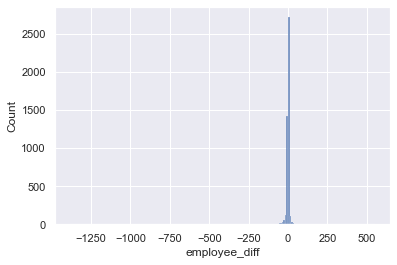

In [94]:
sns.histplot(data=df_merge[df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest"],\
             x="employee_diff", binwidth=10)

<AxesSubplot:xlabel='employee_diff_pct', ylabel='Count'>

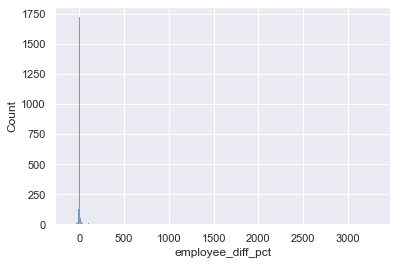

In [106]:
sns.histplot(data=df_merge[(df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
                          (df_merge["employee_diff_pct"] != numpy.Inf)],\
             x="employee_diff_pct", binwidth = 2)

In [110]:
df_merge[(df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
        (df_merge["employee_diff"] > 0)].shape

(1352, 13)

In [111]:
df_merge[(df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
        (df_merge["employee_diff"] < 0)].shape

(1674, 13)

In [112]:
df_merge[(df_merge["Government Function"] == "Police Protection - Persons with Power of Arrest") &\
        (df_merge["employee_diff"] == 0)].shape

(1549, 13)